In [80]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import math

from ipywidgets import interact, widgets, fixed

In [291]:
#Global Variables
G = 6.6742*10**(-11)
M2 = 1.989*10**30
M1 = 1.899*10**27
R = 778.3*10**9
Tj = 3.743*10**8
O = np.sqrt(G*(M1+M2)/R**3)

#Smaller Variables for testing
m = 1
g = 3
o = 1
def nancheck(val):
    '''Checks if a value is undefined and changes its value to 0'''
    if type(val) == list or type(val) == np.ndarray:
        outlist = []
        for i in val:
            if np.isnan(i):
                outlist.append(0)
            else:
                outlist.append(i)
        return np.array(outlist)
    elif np.isnan(val):
        return 0
    else:
        return val
    
def F0(t, h):
    #Blank function if no velocity is needed (for testing)
    tmp_list = [0, 0, 0]
    func_list = []
    for i in tmp_list:
        tmp = nancheck(i)
        func_list.append(tmp)
    return np.array(func_list)

def RK4(rfunc, vfunc, h, rini, vini):
    ti = -4*np.pi/O
    tf = 4*np.pi/O
    t_list = np.linspace(ti, tf, num=(tf-ti)/h);

    r0 = rini
    v0 = vini
    xout = []
    yout = []
    voutl = []
    for t in t_list:
        #This step solves dv/dt = force equation, results in v
        vk1 = h * rfunc(r0, v0, h)
        vk2 = h * (rfunc(r0+h/2, v0, h) + vk1/2)
        vk3 = h * (rfunc(r0+h/2, v0, h) + vk2/2)
        vk4 = h * (rfunc(r0+h, v0, h) + vk3)
        vout = v0 + (1/6)*(vk1 + 2*vk2 + 2*vk3 + vk4)
        #v0 = vout
        
        #This step solve dr/dt = v, results in r
        rk1 = h * vfunc(v0, h)
        rk2 = h * (vfunc(v0+h/2, h) + rk1/2)
        rk3 = h * (vfunc(v0+h/2, h) + rk2/2)
        rk4 = h * (vfunc(v0+h, h) + rk3)
        rout = r0 + (1/6)*(rk1 + 2*rk2 + 2*rk3 + rk4)
        
        r0 = rout
        v0 = vout
        
        #Separating x and y values for every step
        xout.append(r0[0])
        yout.append(r0[1])
        
    return (t_list, xout, yout)

In [82]:
def vel_f(v, h):
    #function representing v for the equation dr/dt = v
    func_list = []
    for i in v:
        tmp = nancheck(i)
        func_list.append(tmp)
    return np.array(func_list)

def vel_term_f(vx, vy, h):
    #Returns velocity term to be used in force equation
    vel_term = 2*m*O* np.array([vy, -vx, 0])
    
    func_list = []
    for i in vel_term:
        tmp = nancheck(i)
        func_list.append(tmp)
    return np.array(func_list)

def rad_f(r, vi, h):
    #Function representing the force equation for dv/dt = force
    r1 = np.array([M2*R/(M1+M2),0,0])
    r2 = np.array([-M1*R/(M1+M2),0,0])
    
    term1 = -G*m*M1*(r-r1)/(np.abs(r-r1)**3)
    term2 = -G*m*M2*(r-r2)/(np.abs(r-r2)**3)
    term3 = (m*O**2)*r
    
    #Velocity term needs flipped components so this step takes care of it
    vx, vy, vz = vi
    vel_term = vel_term_f(vx, vy, h)
    
    tmp_list = term1 + term2 + term3 + vel_term
    func_list = []
    for i in tmp_list:
        tmp = nancheck(i)
        func_list.append(tmp)
    return np.array(func_list)

def rinif(alpha):
    #Given alpha, returns initial position
    return R * np.array([((M2-M1)/(M1+M2))*np.cos(alpha), np.sin(alpha), 0])

In [294]:
rini = rinif(np.pi/3)
vini = R*O*np.array([1,1,0])

tl, xl, yl = RK4(rad_f, vel_f, 10000, rini, vini)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in multiply


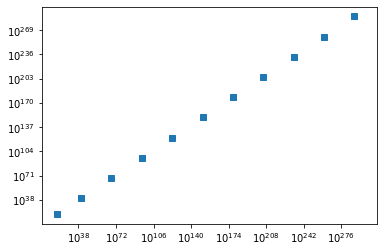

In [304]:
plt.xscale('log')
plt.yscale('log')
plt.plot(xl, yl, 's')

Problem 2

In [287]:
def vel_f_2(v, h):
    #function representing v for the equation dr/dt = v
    func_list = []
    for i in v:
        tmp = nancheck(i)
        func_list.append(tmp)
    return np.array(func_list)

def rad_f_2(r, vi, h):
    #Function representing the force equation for dv/dt = force
    #Given a 3 body variable r separate into individual r_i
    r1, r2, r3 = r
    
    #since mass is the same for all, will use M1 in each instance
    #divided m from both sides of equation so only one m present
    eq1 = -G*M1*(r1-r2)/(np.abs(r1-r2)**3)-G*M1*(r1-r3)/(np.abs(r1-r3)**3)
    eq2 = -G*M1*(r2-r1)/(np.abs(r2-r1)**3)-G*M1*(r2-r3)/(np.abs(r2-r3)**3)
    eq3 = -G*M1*(r3-r1)/(np.abs(r3-r1)**3)-G*M1*(r3-r2)/(np.abs(r3-r2)**3)
    
    tmp_list = [eq1, eq2, eq3]
    func_list = []
    for i in tmp_list:
        tmp = nancheck(i)
        func_list.append(tmp)
    return np.array(func_list)

def r_triangle_inif(d):
    #Given the length of the triangle side d
    #defines starting points for 3 bodies
    b1 = d * np.array([np.cos(np.pi/3), np.sin(np.pi/3), 0])
    b2 = d * np.array([np.cos(3*np.pi/3), np.sin(3*np.pi/3), 0])
    b3 = d * np.array([np.cos(5*np.pi/3), np.sin(5*np.pi/3), 0])
    
    return np.array([b1, b2, b3])

In [292]:
rini2 = r_triangle_inif(5*R)

#Set initial velocity to match expected
z_ar = np.sqrt(G*M1/(5*R))* np.array([1,1,0])
vini2 = np.array(3*[z_ar,])

tl, xl2, yl2 = RK4(rad_f_2, vel_f, 10000, rini2, vini2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


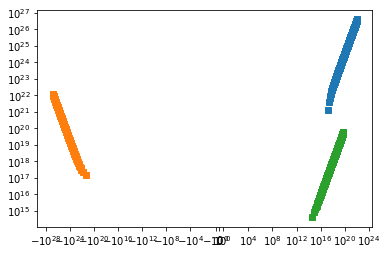

In [293]:
plt.xscale('symlog')
plt.yscale('symlog')
#plt.axis([-1e22, 1e22, -1e22, 1e22])
plt.plot(xl2, yl2, 's')

Problem 3

In [305]:
def ini3(d):
    #Dummy variable input to keep this as a function
    b1 = np.array([.97000436, -.24308753,0])
    b2 = -1 * b1
    b3 = 0 * b1
    bout = np.array([b1, b2, b3])
    
    v3 = np.array([-.93240737, -.86473146,0])
    v1 = -(1/2) * v3
    v2 = v1
    vout = np.array([v1, v2, v3])
    
    return (bout, vout)

def rad_f_2(r, vi, h):
    #Function representing the force equation for dv/dt = force
    #Given a 3 body variable r separate into individual r_i
    r1, r2, r3 = r
    
    #since mass is the same for all, will use M1 in each instance
    #divided m from both sides of equation so only one m present
    eq1 = -g*m*(r1-r2)/(np.abs(r1-r2)**3)-g*m*(r1-r3)/(np.abs(r1-r3)**3)
    eq2 = -g*m*(r2-r1)/(np.abs(r2-r1)**3)-g*m*(r2-r3)/(np.abs(r2-r3)**3)
    eq3 = -g*m*(r3-r1)/(np.abs(r3-r1)**3)-g*m*(r3-r2)/(np.abs(r3-r2)**3)
    
    tmp_list = [eq1, eq2, eq3]
    func_list = []
    for i in tmp_list:
        tmp = nancheck(i)
        func_list.append(tmp)
    return np.array(func_list)

def RK4_3(rfunc, vfunc, h, rini, vini):
    #Changes the use of global variables to 1, otherwise same
    ti = -12*np.pi/o
    tf = 12*np.pi/o
    t_list = np.linspace(ti, tf, num=(tf-ti)/h);

    r0 = rini
    v0 = vini
    xout = []
    yout = []
    for t in t_list:
        #This step solves dv/dt = force equation, results in v
        vk1 = h * rfunc(r0, v0, h)
        vk2 = h * (rfunc(r0+h/2, v0, h) + vk1/2)
        vk3 = h * (rfunc(r0+h/2, v0, h) + vk2/2)
        vk4 = h * (rfunc(r0+h, v0, h) + vk3)
        vout = v0 + (1/6)*(vk1 + 2*vk2 + 2*vk3 + vk4)
        
        
        #This step solve dr/dt = v, results in r
        rk1 = h * vfunc(v0, h)
        rk2 = h * (vfunc(v0+h/2, h) + rk1/2)
        rk3 = h * (vfunc(v0+h/2, h) + rk2/2)
        rk4 = h * (vfunc(v0+h, h) + rk3)
        rout = r0 + (1/6)*(rk1 + 2*rk2 + 2*rk3 + rk4)
        
        r0 = rout
        v0 = vout
        
        #Separating x and y values for every step
        xout.append(r0[0])
        yout.append(r0[1])
        
    return (t_list, xout, yout)

In [317]:
rini3, vini3 = ini3(0)
tl, xl3, yl3 = RK4_3(rad_f_2, vel_f, .01, rini3, vini3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


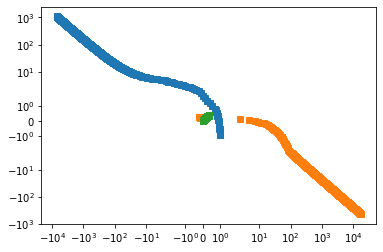

In [319]:
plt.xscale('symlog')
plt.yscale('symlog')
#plt.axis([0, 300, -300, 300])
plt.plot(xl3, yl3, 's')